<a href="https://colab.research.google.com/github/SchrodingersDog2001/string-addition-vs-multiplication/blob/main/String_Addition_versus_Multiplication_Which_is_Faster%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# String addition versus multiplication - which is faster?
In Python, which of these code snippets runs faster and why?
```
  result = s + s + s  # or
  result = "s * 3"?
```
In most cases, the **s * 3** approach is likely to be faster. The reason is that the multiplication operation is usually more efficient and faster than repeated concatenation **+** for strings in Python.

When you use **s * 3** , Python internally performs the multiplication operation once, creating a new string by repeating the original string s three times. This is generally faster because it involves fewer operations and less memory allocation.

On the other hand, when you use **result = s + s + s**, Python has to concatenate strings one by one. This involves creating intermediate string objects at each step, and it can become less efficient, especially when dealing with large strings.

Let's look at a simple example to illustrate the difference:




In [11]:
import timeit

s = "abc"

# Using multiplication
time_mul = timeit.timeit(lambda: s * 3, number=1000000)

# Using concatenation
time_concat = timeit.timeit(lambda: s + s + s, number=1000000)

# Print reults
print("Time using multiplication:", time_mul, "s")
print("Time using concatenation:", time_concat, "s")


Time using multiplication: 0.1556445749993145 s
Time using concatenation: 0.21115280200046982 s


In practice, the performance difference might be negligible for small strings, and the choice between the two methods should also consider readability and the specific requirements of your code. However, for large strings or in performance-critical situations, using multiplication is generally the more efficient approach.

If you run the above code cell multiple times you will notice that the time for each process varies considerably. The multiplication method is always faster, but there is a great variance in the actual time taken for each method.

The code below runs the above process 50 times for each of the two methods. It then calculates the average for each process. This illustrates the large variance in the actual time taken for each process. If you wish to experiment with different numbers of iterations, change the **num_iterations** variable to your desired choice. Why is there such a large variance?

In [12]:
import timeit

s = "abc"
num_iterations = 50

# Initialize variables to store total time for each method
total_time_mul = 0
total_time_concat = 0

for iteration in range(1, num_iterations + 1):
    # Using multiplication
    time_mul = timeit.timeit(lambda: s * 3, number=1000000)
    print(f"Iteration {iteration} - Time using multiplication: {time_mul:.10f} seconds")
    total_time_mul += time_mul

    # Using concatenation
    time_concat = timeit.timeit(lambda: s + s + s, number=1000000)
    print(f"Iteration {iteration} - Time using concatenation: {time_concat:.10f} seconds")
    total_time_concat += time_concat

# Calculate averages
average_time_mul = total_time_mul / num_iterations
average_time_concat = total_time_concat / num_iterations

# Print averages
print("\nAverage time using multiplication:", average_time_mul)
print("Average time using concatenation:", average_time_concat)


Iteration 1 - Time using multiplication: 0.1558224410 seconds
Iteration 1 - Time using concatenation: 0.2033923610 seconds
Iteration 2 - Time using multiplication: 0.1587670260 seconds
Iteration 2 - Time using concatenation: 0.1945396470 seconds
Iteration 3 - Time using multiplication: 0.1584108590 seconds
Iteration 3 - Time using concatenation: 0.1940183790 seconds
Iteration 4 - Time using multiplication: 0.1530941170 seconds
Iteration 4 - Time using concatenation: 0.2195019880 seconds
Iteration 5 - Time using multiplication: 0.1490122200 seconds
Iteration 5 - Time using concatenation: 0.1995653700 seconds
Iteration 6 - Time using multiplication: 0.1460038060 seconds
Iteration 6 - Time using concatenation: 0.2010980580 seconds
Iteration 7 - Time using multiplication: 0.1529240790 seconds
Iteration 7 - Time using concatenation: 0.2143128060 seconds
Iteration 8 - Time using multiplication: 0.1589662890 seconds
Iteration 8 - Time using concatenation: 0.1921352400 seconds
Iteration 9 - Ti

The variation in execution times across multiple iterations can be attributed to several factors, including the following:

1. **System Load:** The overall load on your computer can affect the execution time of your code. If there are other resource-intensive processes running concurrently, they can impact the performance of your Python script.

2. **Caching:** Python and the underlying hardware may use caching mechanisms that can influence the performance of code. For example, if a value is already present in the cache, it might be accessed faster than if it needs to be fetched from slower memory.

3. **Garbage Collection:** Python uses automatic garbage collection to reclaim memory occupied by objects that are no longer in use. The timing of garbage collection can vary between iterations and affect the execution time.

4. **CPU Turbo Boost:** Modern processors often have features like Turbo Boost that dynamically adjust the clock speed based on the load. This can introduce variability in execution times.

5. **Jitter and Noise:** Various system-level factors, including minor fluctuations in the system clock, background processes, and other sources of noise, can introduce variability in execution times.

6. **Compiler Optimizations:** Python uses an interpreter, and the underlying CPython implementation can apply various optimizations. The effectiveness of these optimizations can vary depending on the specific code being executed.

To obtain more consistent and reliable timing measurements, it's common to use techniques like repeating the measurements multiple times, taking averages, and considering the statistical distribution of the results. The timeit module in Python is designed to help with benchmarking by providing a simple interface and taking care of some of these factors. However, even with these precautions, there can still be some variability in execution times due to the factors mentioned above.

We can see the variation more easily if we produce a plot of the data produced when running the code.

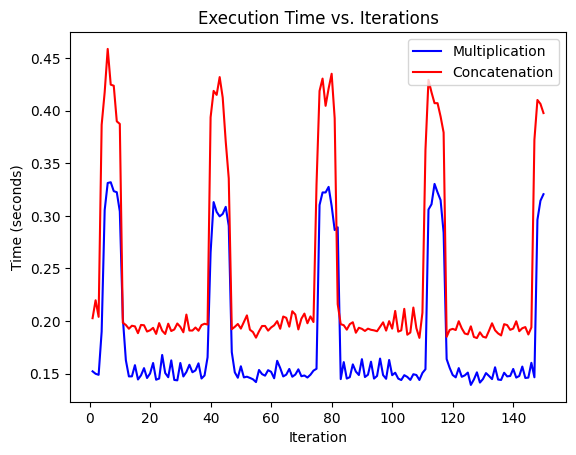

In [13]:
import timeit
import matplotlib.pyplot as plt

s = "abc"
num_iterations = 150

# Initialize lists to store times for each method
times_mul = []
times_concat = []

for iteration in range(1, num_iterations + 1):
    # Using multiplication
    time_mul = timeit.timeit(lambda: s * 3, number=1000000)
    times_mul.append(time_mul)

    # Using concatenation
    time_concat = timeit.timeit(lambda: s + s + s, number=1000000)
    times_concat.append(time_concat)

# Generate x-axis values (iteration numbers)
iterations = list(range(1, num_iterations + 1))

# Plotting the data
plt.plot(iterations, times_mul, label='Multiplication', color='blue')
plt.plot(iterations, times_concat, label='Concatenation', color='red')

# Adding labels and title
plt.xlabel('Iteration')
plt.ylabel('Time (seconds)')
plt.title('Execution Time vs. Iterations')

# Adding legend
plt.legend()

# Display the plot
plt.show()

# What is the periodic variation in execution times for both processes due to?
The periodic increase in execution times you're observing could indeed be related to the operating system's scheduling of processes, or it might be influenced by other factors like system load or background processes.

This code was run using Google's Colab environment, running inside Google's Chrome browser Version 119.0.6045.160 (Official Build) (64-bit), running on a Windows 11 Pro Version 23H2.

This was run on a Lenovo V15 G2 ITL with 11th Gen Intel(R) Core(TM) i5-1135G7 @ 2.40GHz and 8GB of DDR4 RAM.

Here are a few possible explanations:

**Operating System Scheduling:** Windows, like any modern operating system, performs process scheduling to manage the execution of multiple tasks. Periodic variations in execution times could be a result of your Python script competing with other processes for CPU time.

**System Load:** If there are other resource-intensive processes running on your Windows PC, they can impact the performance of your Python script. This includes not only CPU usage but also factors like memory and disk I/O.

**Background Processes:** Windows might be running background processes or services that periodically consume resources. These processes can introduce variability in the execution times of your script.

**Turbo Boost and Dynamic Frequency Scaling:** Modern processors often have features like Turbo Boost and dynamic frequency scaling, where the clock speed is adjusted based on the load. Variability in clock speed can impact the execution times of your code.

**Power Management Settings:** Power management settings can also influence CPU performance. Ensure that your power plan is set to a mode that allows the CPU to operate at its maximum performance if you're concerned about consistent benchmarks.

**Browser Impact:** If you are running the script in a browser environment, the browser itself may introduce variability due to its resource management and background tasks.

To mitigate the impact of these factors, you might consider:

* Running the script in an environment with minimal background processes.
* Checking the system performance during script execution using tools like Task Manager to identify potential resource bottlenecks.
* Running the script outside of a browser environment if applicable.
* Remember that benchmarking on a shared system can introduce variability, and it's often useful to run benchmarks on a dedicated and controlled environment for more reliable results.
* Additionally, averaging results over multiple runs can help smooth out variations caused by external factors.

---
**Last updated,** 25th November 2023, Hal Pattenden.
---